In [99]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import time


0 : [(46, 365, 169, 87), [3, 3], 0]
7 : [(395, 249, 134, 181), [6, 6], 1]
20 : [(89, 191, 87, 169), [2, 3], 1]
26 : [(333, 90, 171, 115), [2, 1], 0]
30 : [(90, 18, 87, 169), [2, 2], 1]
Temps execució: 0.096 segons


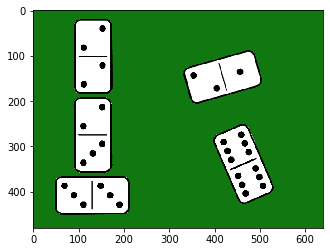

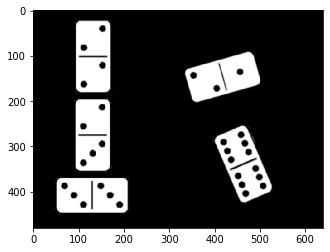

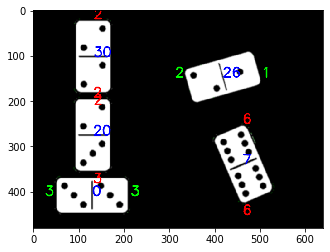

In [179]:
if __name__ == '__main__':
    start = time.time()
    frame = cv.imread('src/test1fitxa.png')
    #frame = cv.imread('src/domino.jpg')
    # Aplicar Threshold
    ret,threshold = cv.threshold(frame,127,255,cv.THRESH_BINARY)
    
    # Aplicar filtre Gaussia per eliminar el soroll
    threshold = cv.GaussianBlur(threshold, (5,5), 0) 
    
    # Deteccio de contorns amb Canny
    #minVal = 0
    #maxVal = 255    
    
    #edges = cv.Canny(threshold,minVal, maxVal)

    # Contorns 
    contorns = threshold[:,:,0]
    
    #contorns = edges.copy()

    contours, hierarchy = cv.findContours(contorns,cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # hierarchy -> [Next, Previous, First_Child, Parent]
    dictContorns = {}
    for i,c in enumerate(contours):
        pare = hierarchy[0][i,3]
        if pare != -1:
            cos = cv.boundingRect(contours[pare])
            x,y,w,h = cv.boundingRect(contours[i])
            punts=[0,0]
            if cos[2] > cos[3]:
                # Horitzontal
                orientacio=0
                if x < cos[0]+int(cos[2]/2):
                    punts=[1,0]
                else:
                    punts=[0,1]
            elif cos[2] < cos[3]:
                # Vertical
                orientacio=1
                if y < cos[1]+int(cos[3]/2):
                    punts=[1,0]
                else:
                    punts=[0,1]
            else:
                print('Error!')
                pass          
            
            if not str(pare) in dictContorns:
                dictContorns[str(pare)]=[cos,punts,orientacio]
            else:               
                dictContorns[str(pare)][1][0]+=punts[0]
                dictContorns[str(pare)][1][1]+=punts[1]
    plt.figure()
    plt.imshow(frame)
    plt.figure()
    plt.imshow(contorns,'gray')
    for d in dictContorns:
        print(d,':',dictContorns[d])
        punts = dictContorns[d][1]
        x,y,w,h = dictContorns[d][0]
        orientacio = dictContorns[d][2]
        margin=20
        if orientacio == 0:
            x1=x-margin
            y1=y+int(h/2)
            x2=x+w
            y2=y+int(h/2)
            im =cv.putText(threshold,str(punts[0]),(x1,y1), cv.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),2,cv.LINE_AA)
            im =cv.putText(threshold,str(punts[1]),(x2,y2), cv.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),2,cv.LINE_AA)
        else:
            x1=x+int(w/2)
            y1=y
            x2=x+int(w/2)
            y2=y+h+margin
            im =cv.putText(threshold,str(punts[0]),(x1,y1), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,0),2,cv.LINE_AA)
            im =cv.putText(threshold,str(punts[1]),(x2,y2), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,0),2,cv.LINE_AA)            
        im =cv.putText(threshold,str(d),(x+int(w/2),(y+int(h/2))), cv.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),2,cv.LINE_AA)
    
    #im =cv.putText(threshold,str(i),(x,y), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,0),2,cv.LINE_AA)
    
    plt.figure()
    plt.imshow(im,'gray')
    
    print('Temps execució: %.3f segons' %(time.time()-start))
    
    